In [42]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz
from scipy import misc
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import pydotplus 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder as le
from sklearn.preprocessing import LabelBinarizer

df= pd.read_csv("top_3000_with_all_features.csv")
df.head(5)

,Position,Track Name,Artist,URL,Streams,duration_ms,mode,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,Mood,Follower # of Artist,Genre,Available Markets
0,1,Shape of You,Ed Sheeran,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2993988783,233713,0,0.581000,0.825,0.652,0.000000,0.0931,-3.183,0.0802,95.977,0.931,Happy/Joyful,24017338,pop,65
1,2,Despacito - Remix,Luis Fonsi,https://open.spotify.com/track/5CtI0qwDJkDQGwX...,1829621841,228827,1,0.229000,0.694,0.815,0.000000,0.0924,-4.328,0.1200,88.931,0.813,Happy/Joyful,2280973,latin,62
2,3,Despacito (Featuring Daddy Yankee),Luis Fonsi,https://open.spotify.com/track/4aWmUDTfIPGksMN...,1460802540,228200,1,0.209000,0.660,0.786,0.000000,0.1120,-4.757,0.1700,177.833,0.846,Happy/Joyful,2280973,latin,62
3,4,Something Just Like This,The Chainsmokers,https://open.spotify.com/track/6RUKPb4LETWmmr3...,1386258295,247160,0,0.049800,0.617,0.635,0.000014,0.1640,-6.769,0.0317,103.019,0.446,Turbulent/Angry,6876127,edm,65
4,5,HUMBLE.,Kendrick Lamar,https://open.spotify.com/track/7KXjTSCq5nL1LoY...,1311243745,177000,0,0.000259,0.904,0.611,0.000020,0.0976,-6.842,0.0888,150.020,0.400,Turbulent/Angry,8971124,hip hop,3


In [43]:


#Trying Robust Scaler
#scaler = RobustScaler()
#df_features['Follower # of Artist'] = scaler.fit_transform(df_features[['Follower # of Artist']])
df_features.to_csv('top300_everyting_encoded_and_not_scaled.csv')

C:\Users\berko\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\berko\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [44]:

#bin=[121,200000,1000000,5000000,20000000]
#df_features['Follower # of Artist']= pd.cut(df_features['Follower # of Artist'],bin,labels=[0,1,2,3])
df_features.dropna(inplace=True)

In [45]:
df_features.dropna(inplace=True)
#df_features.to_csv("top3000_moodbinaryencoded_followerscaled.csv", encoding='utf-8')
df_streams=df_features['Streams']
df_features.drop(['Streams'],axis=1,inplace=True)
#df_features.drop(['mode','duration_ms','tempo','loudness'],axis=1,inplace=True)

df_features


,duration_ms,mode,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,swedish indie pop,swedish pop,trap latino,trap music,tropical house,turkish hip hop,turkish pop,uk drill,uk hip hop,underground hip hop
0,233713,0,0.581000,0.825,0.652,0.000000,0.0931,-3.183,0.0802,95.977,...,0,0,0,0,0,0,0,0,0,0
1,228827,1,0.229000,0.694,0.815,0.000000,0.0924,-4.328,0.1200,88.931,...,0,0,0,0,0,0,0,0,0,0
2,228200,1,0.209000,0.660,0.786,0.000000,0.1120,-4.757,0.1700,177.833,...,0,0,0,0,0,0,0,0,0,0
3,247160,0,0.049800,0.617,0.635,0.000014,0.1640,-6.769,0.0317,103.019,...,0,0,0,0,0,0,0,0,0,0
4,177000,0,0.000259,0.904,0.611,0.000020,0.0976,-6.842,0.0888,150.020,...,0,0,0,0,0,0,0,0,0,0
5,220781,1,0.119000,0.640,0.533,0.000000,0.0864,-6.596,0.0706,99.968,...,0,0,0,0,0,0,0,0,0,0
6,206693,1,0.013000,0.853,0.560,0.000000,0.0944,-4.961,0.0406,134.066,...,0,0,0,0,0,0,0,0,0,0
7,208827,0,0.002560,0.771,0.696,0.000010,0.1790,-6.258,0.0755,116.054,...,0,0,0,0,0,0,0,0,0,0
8,245200,1,0.063100,0.735,0.451,0.000013,0.3250,-8.374,0.0585,117.973,...,0,0,0,0,0,0,0,0,0,0
9,211475,0,0.096900,0.774,0.626,0.000031,0.0848,-4.432,0.0432,100.041,...,0,0,0,0,0,0,0,0,0,0


In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sn
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



In [56]:
bin=[3000000,18671566,50176627,3000000000]
#use pd.cut function can attribute the values into its specific bins
target= pd.cut(df_streams,bin,labels=["Middle","Popular", "Very Popular"])

X_train, X_test, y_train, y_test = train_test_split(df_features, target, test_size=0.2,random_state=42)

naive_model = DecisionTreeClassifier(random_state=42)
param_model = DecisionTreeClassifier(max_depth=6, random_state=42)


def train_and_predict(model, features, target):
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    X_pred=model.predict(X_train)
    print("accuracy score for training data: %.2f" % accuracy_score(X_test, X_pred))
    print("accuracy score for y_test: %.2f" % accuracy_score(y_test, y_pred))
    #print ('Classification Report :')
    #print(classification_report(y_test,y_pred))
    #print ('Confusion Matrix :')
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    '''
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=["Middle","Popular", "Very Popular"],
                      title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=["Middle","Popular", "Very Popular"], normalize=True,
                      title='Normalized confusion matrix')

    plt.show()
    '''
    
train_and_predict(naive_model, df_features, target)
train_and_predict(param_model, df_features, target)

    



ValueError: Found input variables with inconsistent numbers of samples: [578, 2312]

accuracy score: 0.67
Confusion Matrix :
Confusion matrix, without normalization
[[311   9  62]
 [ 57   4  26]
 [ 36   1  72]]
Normalized confusion matrix
[[0.81 0.02 0.16]
 [0.66 0.05 0.3 ]
 [0.33 0.01 0.66]]


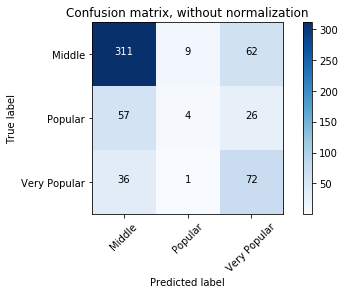

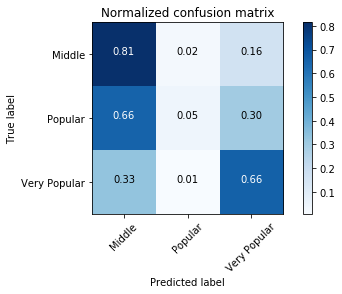

In [48]:
train_and_predict(param_model, df_features, target)

In [54]:
feature_names= df_features.columns.values.tolist()
target_labels=["Middle","Popular", "Very Popular"]

In [55]:
from IPython.display import Image  
dot_data = tree.export_graphviz(param_model, out_file=None, feature_names=feature_names,  
                         class_names=target_labels, filled=True, rounded=True, special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  



InvocationException: Program terminated with status: 1. stderr follows: Error: not well-formed (invalid token) in line 1 
... <HTML>indie r&b &le; 0.5 ...
in label of node 2
